In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [ ]:
csv_files = ['/content/business_data.csv', '/content/education_data.csv', '/content/entertainment_data.csv', '/content/sports_data.csv', '/content/technology_data.csv']

In [ ]:
df_list = [pd.read_csv(os.path.join(f)) for f in csv_files]
df = pd.concat(df_list, ignore_index=True)

In [ ]:
print("Merged Dataset Shape:", df.shape)
print("Columns:", df.columns)
df.head()

Merged Dataset Shape: (10000, 5)
Columns: Index(['headlines', 'description', 'content', 'url', 'category'], dtype='object')


,headlines,description,content,url,category
0,Nirmala Sitharaman to equal Morarji Desai’s re...,With the presentation of the interim budget on...,"Sitharaman, the first full-time woman finance ...",https://indianexpress.com/article/business/bud...,business
1,"‘Will densify network, want to be at least no....","'In terms of market share, we aim to double it...",The merger of Tata group’s budget airlines Air...,https://indianexpress.com/article/business/avi...,business
2,Air India group to induct an aircraft every si...,Air India currently has 117 operational aircra...,The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business
3,Red Sea woes: Exporters seek increased credit ...,Rising attacks forced shippers to consider the...,Indian exporters have asked the central govern...,https://indianexpress.com/article/business/red...,business
4,Air India group to induct a plane every 6 days...,"Apart from fleet expansion, 2024 will also see...",The Air India group plans to induct one aircra...,https://indianexpress.com/article/business/avi...,business


<ipython-input-5-d73c7d03dad7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category', data=df, palette="Set2")


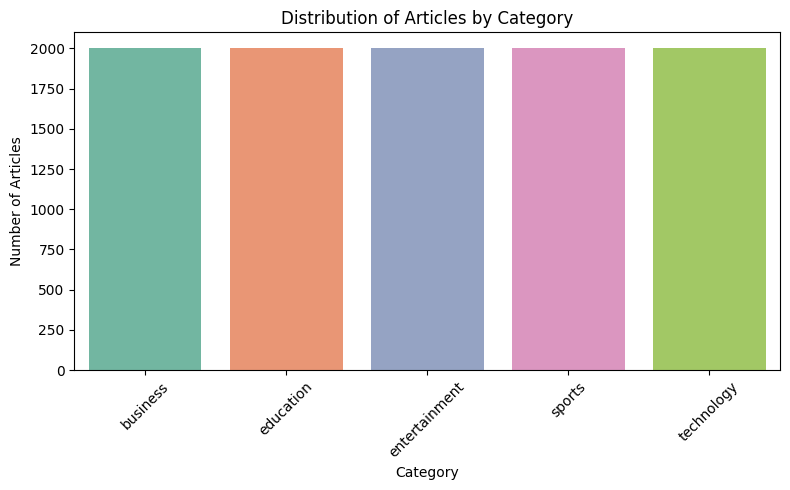

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='category', data=df, palette="Set2")
plt.title('Distribution of Articles by Category')
plt.xlabel('Category')
plt.ylabel('Number of Articles')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-6-20428b68c1d6>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_word_count.index, y=avg_word_count.values, palette="Set3")


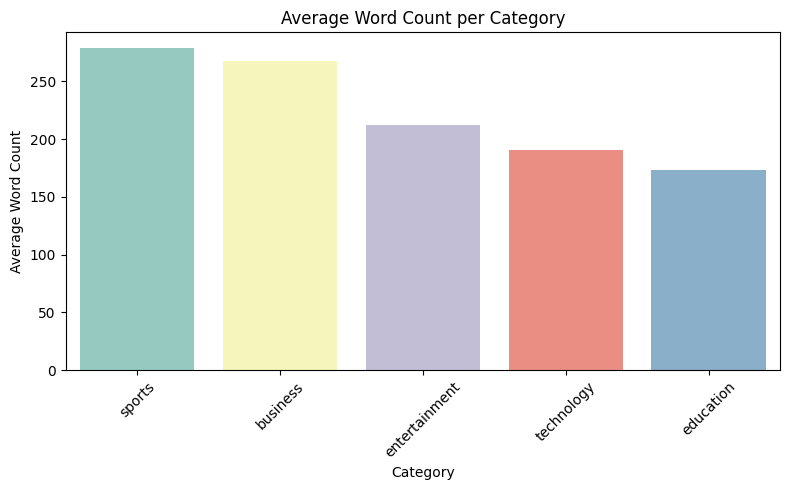

In [ ]:
df['word_count'] = df['content'].astype(str).apply(lambda x: len(x.split()))

avg_word_count = df.groupby('category')['word_count'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x=avg_word_count.index, y=avg_word_count.values, palette="Set3")
plt.title('Average Word Count per Category')
plt.xlabel('Category')
plt.ylabel('Average Word Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
!pip install nltk contractions emoji pyspellchecker


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 23.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 9.2 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
import string
from bs4 import BeautifulSoup
import contractions
import emoji
from spellchecker import SpellChecker

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix
)

from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Re-import and re-download all required NLTK components
# Step 1: Clean install NLTK and force all needed downloads
!pip uninstall -y nltk
!pip install nltk --upgrade --quiet

# Step 2: Import and force-download again
import nltk

nltk.download('punkt', force=True)
nltk.download('stopwords', force=True)
nltk.download('wordnet', force=True)
nltk.download('omw-1.4', force=True)

stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()
spell = SpellChecker()




Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 17.3 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    words = text.split()

    # Initialize lemmatizer and stemmer
    lemmatizer = WordNetLemmatizer()
    stemmer = PorterStemmer()

    # Remove stopwords, apply lemmatization and stemming
    processed_words = [stemmer.stem(lemmatizer.lemmatize(word)) for word in words if word not in stopwords.words('english')]

    return ' '.join(processed_words)

In [ ]:
df['combined_text'] = df['headlines'].astype(str) + " " + \
                      df['description'].astype(str) + " " + \
                      df['content'].astype(str)

In [ ]:
# Apply preprocessing (rerun this after the download)
df['cleaned_text'] = df['combined_text'].apply(preprocess_text)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

# Use cleaned text as input
texts = df['cleaned_text'].fillna('')  # just in case of missing values

# ---------------------------
# 1. TF-IDF (word-level unigrams & bigrams)
# ---------------------------
tfidf_word_vectorizer = TfidfVectorizer(analyzer='word', ngram_range=(1, 2), max_features=5000)
X_tfidf_word = tfidf_word_vectorizer.fit_transform(texts)

# ---------------------------
# 2. TF-IDF (character-level n-grams)
# ---------------------------
tfidf_char_vectorizer = TfidfVectorizer(analyzer='char', ngram_range=(2, 5), max_features=5000)
X_tfidf_char = tfidf_char_vectorizer.fit_transform(texts)

# ---------------------------
# 3. CountVectorizer (optional - word level)
# ---------------------------
count_vectorizer = CountVectorizer(analyzer='word', ngram_range=(1, 2), max_features=5000)
X_count = count_vectorizer.fit_transform(texts)

# Output the shape of each representation
print("TF-IDF Word-level shape:", X_tfidf_word.shape)
print("TF-IDF Char-level shape:", X_tfidf_char.shape)
print("CountVectorizer shape  :", X_count.shape)


TF-IDF Word-level shape: (10000, 5000)
TF-IDF Char-level shape: (10000, 5000)
CountVectorizer shape  : (10000, 5000)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode labels (assuming column is named 'category')
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['category'])

# Split dataset (using TF-IDF word-level features as example)
X_train, X_test, y_train, y_test = train_test_split(X_tfidf_word, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Helper function to train and evaluate
def train_evaluate(model, name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"--- {name} ---")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
train_evaluate(lr, "Logistic Regression")

# Multinomial Naive Bayes
nb = MultinomialNB()
train_evaluate(nb, "Multinomial Naive Bayes")

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
train_evaluate(rf, "Random Forest")

# XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
train_evaluate(xgb, "XGBoost")


--- Logistic Regression ---
Accuracy: 0.986
               precision    recall  f1-score   support

     business       0.98      0.97      0.97       410
    education       1.00      0.99      1.00       393
entertainment       1.00      0.99      1.00       395
       sports       0.99      1.00      0.99       415
   technology       0.96      0.97      0.97       387

     accuracy                           0.99      2000
    macro avg       0.99      0.99      0.99      2000
 weighted avg       0.99      0.99      0.99      2000

--- Multinomial Naive Bayes ---
Accuracy: 0.985
               precision    recall  f1-score   support

     business       0.98      0.96      0.97       410
    education       1.00      0.99      1.00       393
entertainment       1.00      1.00      1.00       395
       sports       0.99      1.00      0.99       415
   technology       0.96      0.98      0.97       387

     accuracy                           0.98      2000
    macro avg       0.9

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [06:13:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


--- XGBoost ---
Accuracy: 0.9765
               precision    recall  f1-score   support

     business       0.97      0.96      0.97       410
    education       0.99      0.99      0.99       393
entertainment       0.99      0.97      0.98       395
       sports       0.99      0.98      0.99       415
   technology       0.94      0.97      0.96       387

     accuracy                           0.98      2000
    macro avg       0.98      0.98      0.98      2000
 weighted avg       0.98      0.98      0.98      2000



In [ ]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, classification_report

# Predict again if needed
y_pred = lr.predict(X_test)

# Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:
               precision    recall  f1-score   support

     business       0.98      0.97      0.97       410
    education       1.00      0.99      1.00       393
entertainment       1.00      0.99      1.00       395
       sports       0.99      1.00      0.99       415
   technology       0.96      0.97      0.97       387

     accuracy                           0.99      2000
    macro avg       0.99      0.99      0.99      2000
 weighted avg       0.99      0.99      0.99      2000



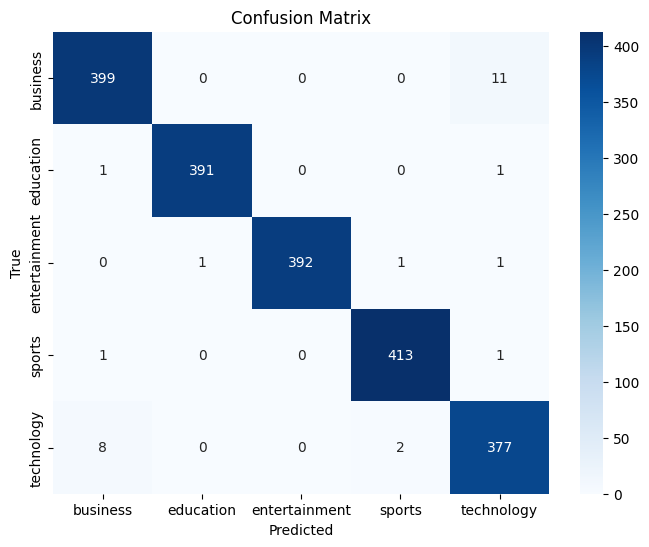

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Generate and plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# Run 5-fold CV on Logistic Regression
cv_scores = cross_val_score(lr, X_tfidf_word, y, cv=5, scoring='accuracy')
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-Validation Accuracy Scores: [0.975  0.981  0.9805 0.989  0.987 ]
Mean CV Accuracy: 0.9824999999999999


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier
import numpy as np

# Define the parameter grid
param_dist = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [3, 5, 7, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=20,  # You can increase this for more thorough search
    scoring='accuracy',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit on full dataset
random_search.fit(X_tfidf_word, y)

# Best parameters and score
print("Best Parameters:", random_search.best_params_)
print("Best Accuracy:", random_search.best_score_)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [ ]:
from sklearn.model_selection import GridSearchCV

# Use smaller grid to avoid long runtimes
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1]
}

grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,
    verbose=2,
    n_jobs=-1
)

grid_search.fit(X_tfidf_word, y)

print("Best Parameters from GridSearchCV:", grid_search.best_params_)
print("Best Score from GridSearchCV:", grid_search.best_score_)


In [ ]:
# Assuming new_data is a DataFrame with 'headline', 'short_description', 'content' columns
new_data['combined_text'] = new_data['headlines'] + " " + new_data['description'] + " " + new_data['content']
new_data['cleaned_text'] = new_data['combined_text'].apply(preprocess_text)

# Apply the same vectorizer (TF-IDF) to transform the new data
X_new = tfidf_word_vectorizer.transform(new_data['cleaned_text'])

# Make predictions on the new/unseen data
y_new_pred = random_search.best_estimator_.predict(X_new)

# Convert numerical predictions back to original class labels
y_new_pred_labels = label_encoder.inverse_transform(y_new_pred)
new_data['predicted_category'] = y_new_pred_labels


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
cm = confusion_matrix(y_new, y_new_pred)  # assuming you have ground truth 'y_new'

# Plot confusion matrix using seaborn heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for New Data')
plt.show()

# Print classification report
print("Classification Report for New Data:")
print(classification_report(y_new, y_new_pred, target_names=label_encoder.classes_))


In [ ]:
import joblib

# Save the trained model (XGBoost, or any model you trained)
joblib.dump(random_search.best_estimator_, 'xgb_news_classifier.joblib')

# Save the vectorizer (for future use with new data)
joblib.dump(tfidf_word_vectorizer, 'tfidf_word_vectorizer.joblib')


In [ ]:
# Load the saved model
model = joblib.load('xgb_news_classifier.joblib')

# Load the saved vectorizer
vectorizer = joblib.load('tfidf_word_vectorizer.joblib')

# Transform new unseen data
X_new_transformed = vectorizer.transform(new_data['cleaned_text'])

# Generate predictions
y_new_pred = model.predict(X_new_transformed)

# Convert back to original labels
y_new_pred_labels = label_encoder.inverse_transform(y_new_pred)
